# TAREA 4
Diana Islas Flores

EJERCICIO 1: IMAGEN con otro archivo

Utilizando el script para obtener la fecha y  abrir el archivo, se abre el archivo del ABI L2 canal 11 (o el "Cloud-Top Phase" Band) del dia 11/10/2018 a las 00:27Z.

In [1]:
import matplotlib.pyplot as plt
%matplotlib
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap # Import the Basemap toolkit
import numpy as np # Import the Numpy package
from cpt_convert import loadCPT # Import the CPT convert function
from matplotlib.colors import LinearSegmentedColormap # Linear interpolation for color maps
from datetime import datetime
from pyproj import Proj

cpt = loadCPT('IR4AVHRR6.cpt')
cpt_convert = LinearSegmentedColormap('cpt', cpt)

# File channel 11 (Cloud-Top Phase)
path = 'OR_ABI-L2-CMIPC-M3C11_G16_s20182840027202_e20182840029575_c20182840030028.nc'

Start = (path[path.find("_s")+2:path.find("_e")-1])
End = (path[path.find("_e")+2:path.find("_c")-1])
datetime_start = datetime.strptime(Start,'%Y%j%H%M%S')
datetime_end = datetime.strptime(End,'%Y%j%H%M%S')

nc = Dataset(path)
data = nc.variables['CMI'][:]

ori_proj = nc.variables['goes_imager_projection']
sat_h = ori_proj.perspective_point_height
sat_lon = ori_proj.longitude_of_projection_origin
sat_sweep = ori_proj.sweep_angle_axis

X = nc.variables['x'][:] * sat_h
Y = nc.variables['y'][:] * sat_h
p = Proj(proj='geos', h=sat_h, lon_0=sat_lon,sweep=sat_sweep)
XX, YY = np.meshgrid(X, Y)
lons, lats = p(XX, YY, inverse=True)


Using matplotlib backend: MacOSX


Se utiliza el script para graficar todo el archivo en vista del satelite con basemap. Este archivo da la temperatura de brillo. NOTA: se debe poner las coordenadas de llcrnrx=X.min(),llcrnry=Y.min(),urcrnrx=X.max(),urcrnry=Y.max() para tener la posicion correcta.

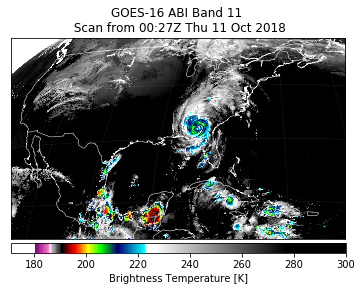

In [2]:
bmap = Basemap(projection='geos', lon_0=-75, lat_0=0.0, llcrnrx=X.min(),llcrnry=Y.min(),urcrnrx=X.max(),urcrnry=Y.max(), ellps='WGS84', resolution='l')
bmap.imshow(data, origin='upper', vmin=171, vmax=300, cmap=cpt_convert)
bmap.drawcoastlines(linewidth=0.5, linestyle='solid', color='white')
bmap.drawcountries(linewidth=0.5, linestyle='solid', color='white')
bmap.drawparallels(np.arange(-90.0, 90.0, 10.0), linewidth=0.1, color='white')
bmap.drawmeridians(np.arange(0.0, 360.0, 10.0), linewidth=0.1, color='white')
 
bmap.colorbar(location='bottom', label='Brightness Temperature [K]')

date_formatted = datetime.strftime(datetime_start,'%H:%MZ %a %d %b %Y')
plt.title("GOES-16 ABI Band 11 \n Scan from " +date_formatted)

plt.rcParams['figure.figsize'] = (8,8)
plt.show()

EJERCICIO 2: Rehacer imagen de cuba 'zoom' con otra region (mismo archivo de la clase)

Primero se obtendra el zoom utilizando el archivo.

Se obtiene el subset del archivo que contiene el estado de Carolina del Norte (NC) que estan dentro del las coordenadas -89 a -73 lon y de  29 a 39 lat. En esta parte se utilizo CANAL 11.

In [3]:
lons_subset=lons[381:799,1156:1904]
lats_subset=lats[381:799,1156:1904]
data_subset=data[381:799,1156:1904]

Se obtine la imagen de la region.

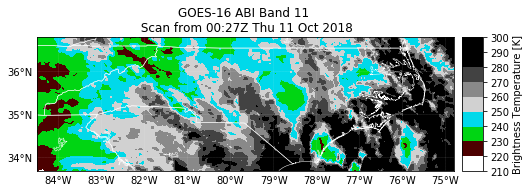

In [4]:
bmap = Basemap(projection='cyl', llcrnrlon=-84.5, llcrnrlat=33.7, urcrnrlon=-74.8, urcrnrlat=36.8,  resolution='h')
bmap.contourf(lons_subset,lats_subset,data_subset,cmap=cpt_convert)
bmap.drawcoastlines(linewidth=0.5, linestyle='solid', color='white')
bmap.drawcountries(linewidth=0.5, linestyle='solid', color='white')
bmap.drawstates(linewidth=0.5, linestyle='solid', color='white')
bmap.drawparallels(np.arange(-90.0, 90.0, 1.0), linewidth=0.15, color='white', labels=[True, False, False, True])
bmap.drawmeridians(np.arange(0.0, 360.0, 1.0), linewidth=0.15, color='white', labels=[True, False, False, True])
bmap.colorbar(location='right', label='Brightness Temperature [K]')
date_formatted = datetime.strftime(datetime_start,'%H:%MZ %a %d %b %Y')
plt.title("GOES-16 ABI Band 11 \n Scan from " +date_formatted)
plt.rcParams['figure.figsize'] = (10,20)
plt.show()

Ahora utilizando el archivo de la clase (el del zoom de cuba) para el zoom de NC (Realizar la imagen tarda un minuto o más). NOTA: EL ARCHIVO NO ESTA EN EL FOLDER DEBIDO A QUE ES MUY GRANDE (MAS DE 25mb). Es el mismo que nos paso en clase.

In [5]:
path = 'OR_ABI-L2-CMIPC-M3C02_G16_s20182041817297_e20182041820070_c20182041820181.nc'
Start = (path[path.find("_s")+2:path.find("_e")-1])
End = (path[path.find("_e")+2:path.find("_c")-1])
datetime_start = datetime.strptime(Start,'%Y%j%H%M%S')
datetime_end = datetime.strptime(End,'%Y%j%H%M%S')
nc = Dataset(path)
data = nc.variables['CMI'][:]
ori_proj = nc.variables['goes_imager_projection']
sat_h = ori_proj.perspective_point_height
sat_lon = ori_proj.longitude_of_projection_origin
sat_sweep = ori_proj.sweep_angle_axis
X = nc.variables['x'][:] * sat_h
Y = nc.variables['y'][:] * sat_h
p = Proj(proj='geos', h=sat_h, lon_0=sat_lon,sweep=sat_sweep)
XX, YY = np.meshgrid(X, Y)
lons, lats = p(XX, YY, inverse=True)
lons_subset=lons[1500:3000,5000:7500]
lats_subset=lats[1500:3000,5000:7500]
data_subset=data[1500:3000,5000:7500]


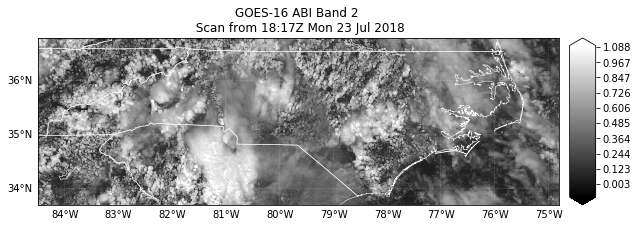

In [6]:
bmap = Basemap(projection='cyl', llcrnrlon=-84.5, llcrnrlat=33.7, urcrnrlon=-74.8, urcrnrlat=36.8,  resolution='h')
levels=np.linspace(-0.1, 1.1, 200)
bmap.contourf(lons_subset,lats_subset,data_subset,levels=levels, cmap="gist_gray", extend='both')
bmap.drawcoastlines(linewidth=0.5, linestyle='solid', color='white')
bmap.drawcountries(linewidth=0.5, linestyle='solid', color='white')
bmap.drawstates(linewidth=0.5, linestyle='solid', color='white')
bmap.drawparallels(np.arange(-90.0, 90.0, 1.0), linewidth=0.15, color='white', labels=[True, False, False, True])
bmap.drawmeridians(np.arange(0.0, 360.0, 1.0), linewidth=0.15, color='white', labels=[True, False, False, True])
bmap.colorbar(location='right')

date_formatted = datetime.strftime(datetime_start,'%H:%MZ %a %d %b %Y')

plt.title("GOES-16 ABI Band 2 \n Scan from " +date_formatted)
plt.rcParams['figure.figsize'] = (10,20)
plt.show()

EJERCICIO 3:

Se realiza el cambio a reflectancia para cada canal y se obtiene el gamma de cada uno como se vio en clase.
Despues

Se obtienen los valores de las ecuaciones de la pagina 
http://www.goes-r.gov/products/ATBDs/baseline/Imagery_v2.0_no_color.pdf para obtener la reflectancia de cada canal.

In [7]:
Esun_Ch_01 = 726.721072
Esun_Ch_02 = 663.274497
Esun_Ch_03 = 441.868715
d2 = 0.3 

Se obtiene la reflectancia para el canal 1:

In [8]:
g16nc = Dataset('OR_ABI-L1b-RadM1-M3C02_G16_s20171931811268_e20171931811326_c20171931811356.nc', 'r')
radiance = g16nc.variables['Rad'][:]
g16nc.close()
g16nc = None
# Reflectancia
ref = (radiance * np.pi * d2) / Esun_Ch_02
ref = np.maximum(ref, 0.0)
ref = np.minimum(ref, 1.0)
# Gamma de reflectancia
ref_gamma = np.sqrt(ref)

Se obtiene la reflectancia para el canal 2:

In [9]:
g16nc = Dataset('OR_ABI-L1b-RadM1-M3C01_G16_s20171931811268_e20171931811326_c20171931811369.nc', 'r')
radiance_1 = g16nc.variables['Rad'][:]
g16nc.close()
g16nc = None
ref_1 = (radiance_1 * np.pi * d2) / Esun_Ch_01
ref_1 = np.maximum(ref_1, 0.0)
ref_1 = np.minimum(ref_1, 1.0)
ref_gamma_1 = np.sqrt(ref_1)

Se obtiene la reflectancia para el canal 3:

In [10]:
g16nc = Dataset('OR_ABI-L1b-RadM1-M3C03_G16_s20171931811268_e20171931811326_c20171931811371.nc', 'r')
radiance_3 = g16nc.variables['Rad'][:]
g16nc.close()
g16nc = None
ref_3 = (radiance_3 * np.pi * d2) / Esun_Ch_03
ref_3 = np.maximum(ref_3, 0.0)
ref_3 = np.minimum(ref_3, 1.0)
ref_gamma_3 = np.sqrt(ref_3)

In [11]:
def rebin(a, shape):
    sh = shape[0],a.shape[0]//shape[0],shape[1],a.shape[1]//shape[1]
    return a.reshape(sh).mean(-1).mean(1)
ref_gamma_2 = rebin(ref_gamma, [1000, 1000])

Se juntan las tres reflectancias en 'geocolor'. El segundo canal (ref_gamma_2) da un tono rojo, el tercer canal (ref_gamma_3) da un tono verde (vegentación) y el primero da un tono azul. La combianion de los tres da una imagen con colores que distinguen la vegentacion de la tierra y 'nubosidad' de la atmosfera. 

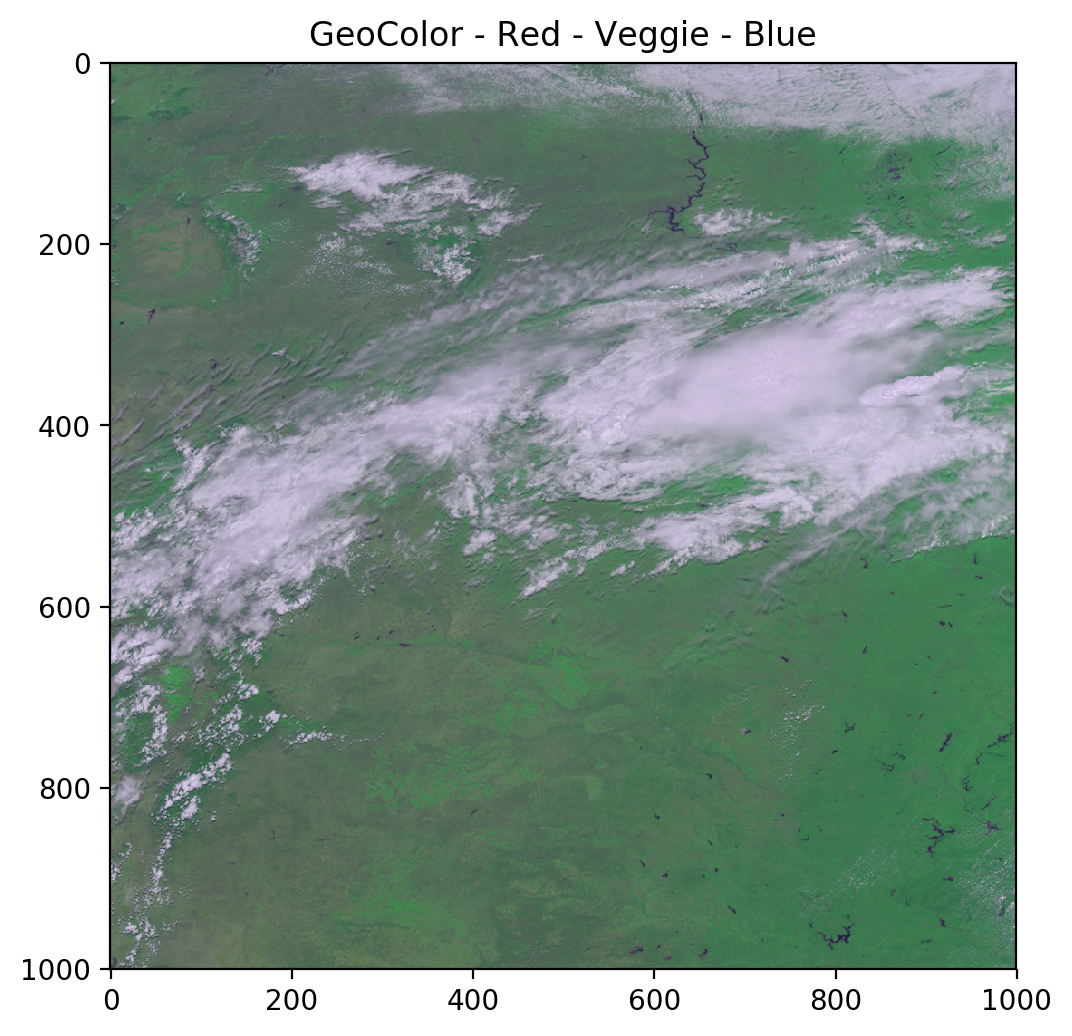

In [12]:
geocolor = np.stack([ref_gamma_2, ref_gamma_3, ref_gamma_1], axis=2)
fig = plt.figure(figsize=(6,6),dpi=200)
im = plt.imshow(geocolor)
plt.title('GeoColor - Red - Veggie - Blue')
plt.show()

Se modificaron los valores de la gamma de reflectancia para cada canal para mejor imagen o al menos más 'real' ya que los verdes no sobresaltan tanto para darle un tono falso a la imagen (lo que ocurre en la imagen sin modificacion a la reflectancia gamma de cada canal). La modificacion es geocolor1.

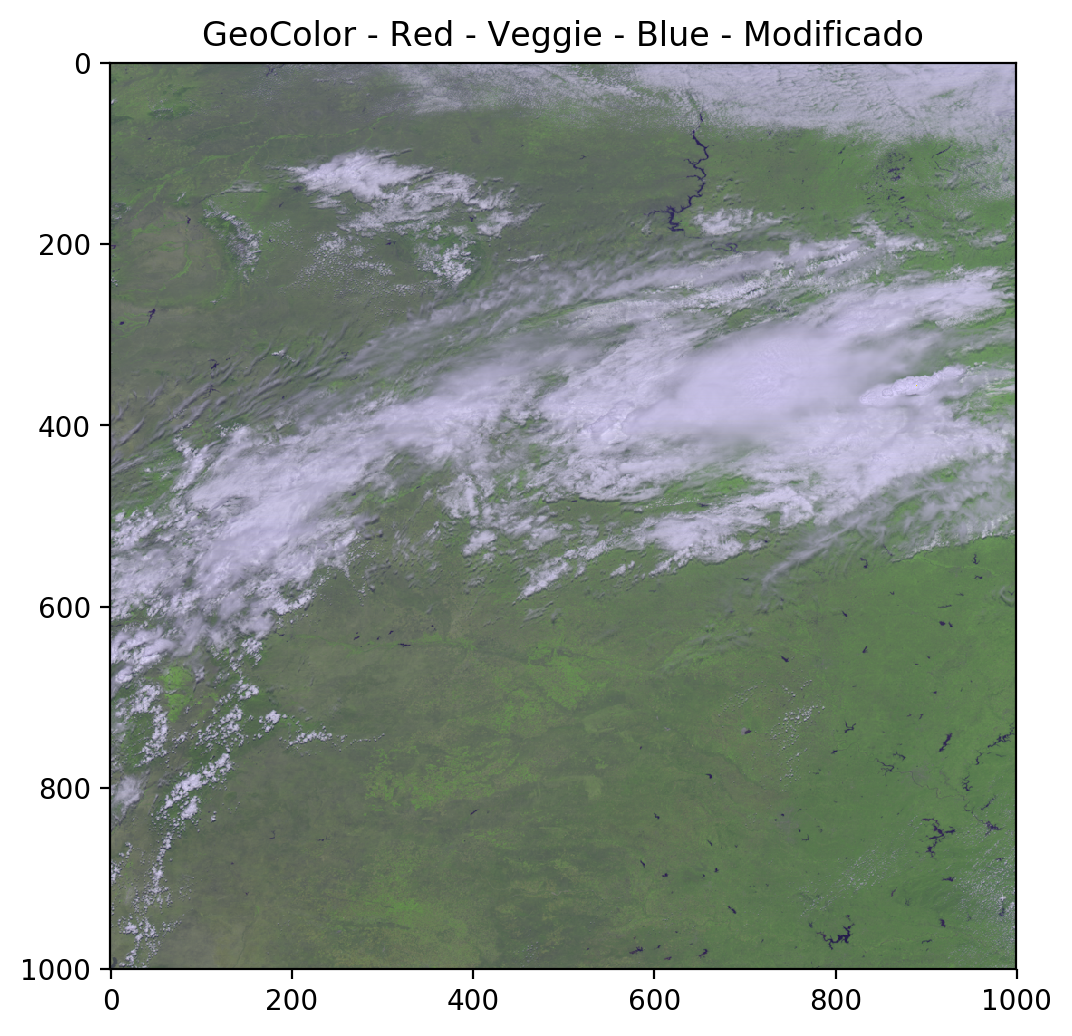

In [13]:
geocolor1 = np.stack([ref_gamma_3*.5+ref_gamma_2*0.5, ref_gamma_3*1, ref_gamma_1*1.02], axis=2)
fig = plt.figure(figsize=(6,6),dpi=200)
im = plt.imshow(geocolor1)
plt.title('GeoColor - Red - Veggie - Blue - Modificado')
plt.show()

Utilizando la modificacion al tercer canal del planet lab como se vio en clase da una imagen mucho más real. Como se observa, este cambio es mejor que el realizado para la tarea (el geocolor1). 

In [14]:
# Derived from Planet Labs data, CC > 0.9
ref_gamma_true_green = 0.48358168 * ref_gamma_2 + 0.45706946 * ref_gamma_1 + 0.06038137 * ref_gamma_3

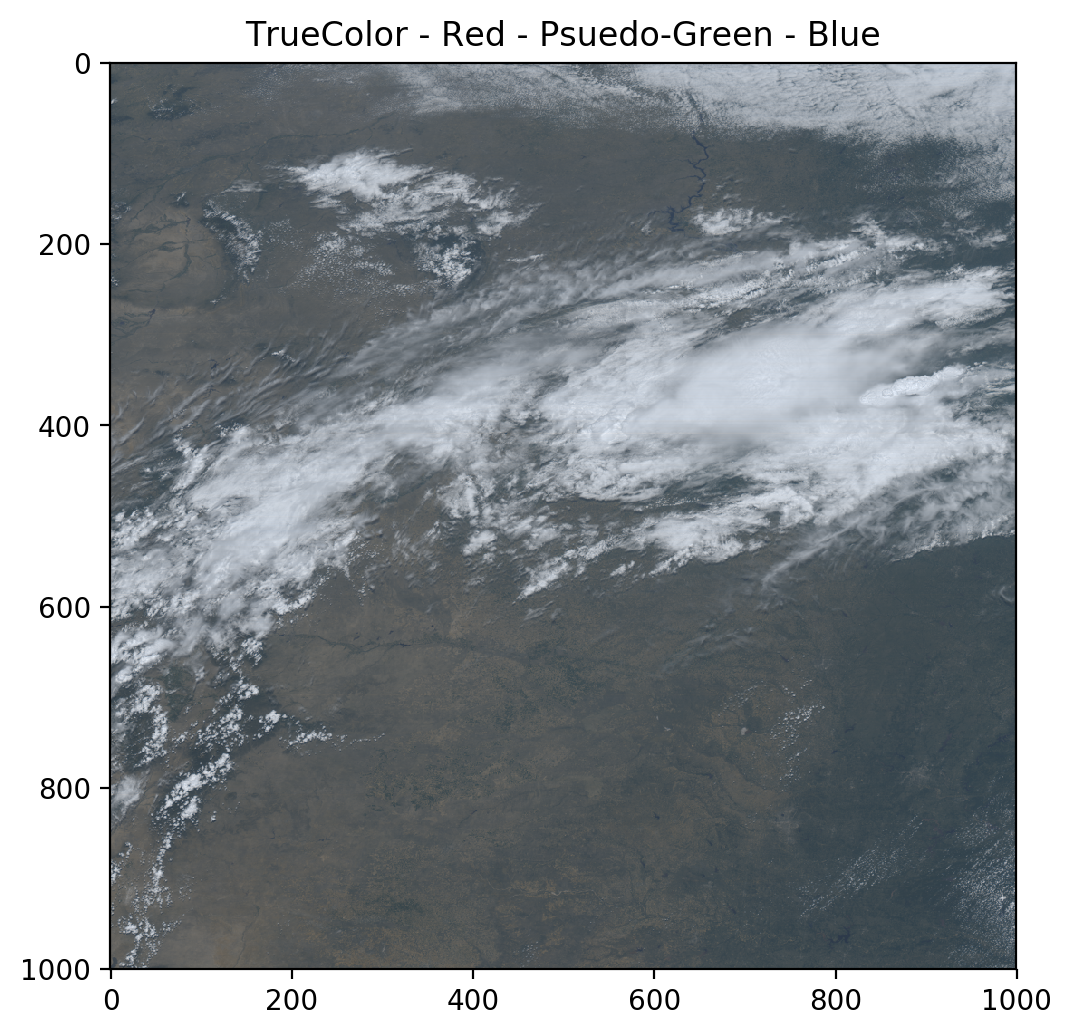

In [15]:
truecolor = np.stack([ref_gamma_2, ref_gamma_true_green, ref_gamma_1], axis=2)
fig = plt.figure(figsize=(6,6),dpi=200)
im = plt.imshow(truecolor)
plt.title('TrueColor - Red - Psuedo-Green - Blue')
plt.show()